# **Sentimen Analisis Review APK Play Store**
---
Selamat datang dalam proyek Sentimen Analisi Review APK Play Store ini! Dalam era digital yang berkembang pesat ini, ulasan pengguna memiliki peran penting dalam membentuk persepsi terhadap aplikasi mobile. Dalam proyek ini, kita akan menjelajahi dunia analisis sentimen untuk memahami bagaimana orang merasakan dan mengungkapkan pendapat mereka tentang aplikasi di Google Play Store.

Analisis sentimen adalah salah satu cabang penting dalam pemrosesan bahasa alami yang memungkinkan kita untuk secara otomatis mengidentifikasi apakah ulasan pengguna cenderung positif atau
negatif. Dengan demikian, proyek ini akan membantu kita dalam memahami umpan balik pengguna dengan lebih baik, dan dapat digunakan untuk mengambil keputusan yang lebih baik dalam pengembangan dan perbaikan aplikasi.

Dalam perjalanan ini, kita akan menggali konsep-konsep penting dalam analisis sentimen, seperti pengolahan teks, ekstraksi fitur, dan penggunaan model machine learning untuk memprediksi sentimen ulasan. Kami akan menggunakan bahasa pemrograman Python dan beberapa pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

Tentunya, proyek ini akan memberi Anda wawasan yang berharga dalam analisis sentimen dan keterampilan pemrograman yang relevan. Mari kita mulai memahami bagaimana kita dapat mengungkap sentimen di balik ulasan pengguna di Play Store!


## **Import Library**

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Scapping Dataset**
---
Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "MyTelkomsel" di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, kita akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi "MyTelkomsel" cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna. Mari kita mulai menjelajahi ulasan pengguna dan menganalisis sentimen di sekitar aplikasi "MyTelkomsel" dengan lebih mendalam.

In [ ]:
from google_play_scraper import reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.telkomsel.telkomselcm',     # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    # count=1000             # Jumlah maksimum ulasan yang ingin diambil
)

In [ ]:
scrapreview[0]

{'reviewId': 'ce590d13-60cc-4f25-8092-e4a3430cf849',
 'userName': 'Pengguna Google',
 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
 'content': 'Makin hari makin BURUK! segala upaya biar lancar masuk aplikasi tetap ga berubah! clear cache/install ulang aplikasi tetap BERAT! kebanyakan "fitur" ga penting! Menu Homepage aja buat liat kuota/pulsa loadingnya parah,LAMA.. Aplikasi cuma buat liat kuota/pulsa/beli paket data lemotnya ngelebihin aplikasi Online Shop! sering crash,kadang force close.Ada stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu.',
 'score': 1,
 'thumbsUpCount': 367,
 'reviewCreatedVersion': '8.6.2',
 'at': datetime.datetime(2025, 1, 25, 18, 8, 25),
 'replyContent': 'Hai Kak RNP. Mohon maaf untuk ketidaknyamanannya ya, apabila aplikasi MyTelkomsel terlalu berat di handphone kakak, silakan coba unduh MyTelkomsel Basic. Aplikasi ini sudah tersedia di PlayStore. 

## **Load Dataset**

In [ ]:
reviews_df = pd.DataFrame(scrapreview)
reviews_df.to_csv('ulasan_aplikasi.csv', index=False)
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ce590d13-60cc-4f25-8092-e4a3430cf849,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin hari makin BURUK! segala upaya biar lanc...,1,367,8.6.2,2025-01-25 18:08:25,Hai Kak RNP. Mohon maaf untuk ketidaknyamanann...,2025-01-26 04:44:33,8.6.2
1,c2817ef4-d1b0-417d-9eb8-3adf1f160403,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Perbaiki dulu jaringannya paketnya sudah mahal...,1,19,8.6.1,2025-01-11 05:53:39,None,NaT,8.6.1
2,2ae70b78-6a19-4279-99e8-a7427a417ffb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku gak ngerti ya! Lama2 aplikasinya makin nge...,2,8,8.6.1,2025-01-14 05:20:42,None,NaT,8.6.1
3,168c3318-ff28-4c4b-a3b5-f2e9c53b80a0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sebenarnya sudah mulai bosan, sebab masalahnya...",1,651,8.6.2,2025-01-23 01:11:23,Hai Kak Kurniadi. Mohon maaf untuk ketidaknyam...,2025-01-23 03:57:10,8.6.2
4,b2a4a78f-53f9-4f87-a921-6fdd7a5af4eb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"makin kesini aplikasi makin berat, buka aplika...",2,63,8.6.2,2025-01-24 10:52:42,None,NaT,8.6.2


In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame
review_count, column_count = reviews_df.shape
print(f"Number of Reviews: {review_count}")
print(f"Number of Columns: {column_count}")

Number of Reviews: 117000
Number of Columns: 11


In [ ]:
# Menampilkan informasi tentang DataFrame reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117000 entries, 0 to 116999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              117000 non-null  object        
 1   userName              117000 non-null  object        
 2   userImage             117000 non-null  object        
 3   content               117000 non-null  object        
 4   score                 117000 non-null  int64         
 5   thumbsUpCount         117000 non-null  int64         
 6   reviewCreatedVersion  97817 non-null   object        
 7   at                    117000 non-null  datetime64[ns]
 8   replyContent          56725 non-null   object        
 9   repliedAt             56725 non-null   datetime64[ns]
 10  appVersion            97817 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.8+ MB


In [ ]:
reviews_df.drop(columns=['reviewId', 'userName', 'userImage', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], inplace=True)
reviews_df.head()

,content
0,Makin hari makin BURUK! segala upaya biar lanc...
1,Perbaiki dulu jaringannya paketnya sudah mahal...
2,Aku gak ngerti ya! Lama2 aplikasinya makin nge...
3,"Sebenarnya sudah mulai bosan, sebab masalahnya..."
4,"makin kesini aplikasi makin berat, buka aplika..."


In [ ]:
# Menampilkan informasi tentang DataFrame reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117000 entries, 0 to 116999
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  117000 non-null  object
dtypes: object(1)
memory usage: 914.2+ KB


In [ ]:
reviews_df[reviews_df['content'].isna()]

,content


In [ ]:
# Menghapus baris yang memiliki nilai yang hilang (NaN) dari reviews_df
reviews_df = reviews_df.dropna()

In [ ]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117000 entries, 0 to 116999
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  117000 non-null  object
dtypes: object(1)
memory usage: 914.2+ KB


In [ ]:
reviews_df[reviews_df.duplicated()].sort_values('content').head()

,content
84181,"Aktivasi paket langsung aktif, no delay"
80192,Apk ga bisa dibuka
85947,Apk nya gak bisa di buka
75759,Apk nya gak bisa di buka
75651,Apk nya gk bisa di buka


In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
reviews_df = reviews_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
review_count, column_count = reviews_df.shape
print(f"Number of Reviews: {review_count}")
print(f"Number of Columns: {column_count}")

Number of Reviews: 116499
Number of Columns: 1


In [ ]:
reviews_df[reviews_df.duplicated()].sort_values('content').head()

,content


## **Preprocessing**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `add_cleaning(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `add_casefolding(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `add_tokenizing(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `add_stopwords(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `add_stemming(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `to_sentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [ ]:
def add_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
  text = re.sub(r'RT[\s]', '', text) # remove RT
  text = re.sub(r"http\S+", '', text) # remove link
  text = re.sub(r'[0-9]+', '', text) # remove numbers
  text = re.sub(r'[^\w\s]', '', text) # remove characters except letter and space

  text = text.replace('\n', ' ') # replace new line into space
  text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
  text = text.strip(' ') # remove characters space from both left and right text
  return text

def add_casefolding(text):
  text = text.lower()
  return text

def add_tokenizing(text):
  text = word_tokenize(text)
  return text

def add_stopwords(text):
  list_stopwords_in = set(stopwords.words('indonesian'))
  list_stopwords_en = set(stopwords.words('english'))
  list_stopwords_in.update(list_stopwords_en)
  list_stopwords_in.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
    if txt not in list_stopwords_in:
      filtered.append(txt)
  text = filtered
  return text

def add_stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # # Memecah teks menjadi daftar kata
  # words = text.split()

  # # Menerapkan stemming pada setiap kata dalam daftar
  # stemmed_words = [stemmer.stem(word) for word in words]

  # Menerapkan stemming pada setiap kata dalam daftar
  stemmed_words = [stemmer.stem(word) for word in text]

  # Menggabungkan kata-kata yang telah distem
  stemmed_text = ' '.join(stemmed_words)

  return stemmed_text

def to_sentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def add_slangwords(text):
  words = text.split()
  fixed_words = []

  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)

  fixed_text = ' '.join(fixed_words)
  return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [ ]:
reviews_df.head()

,content
0,Makin hari makin BURUK! segala upaya biar lanc...
1,Perbaiki dulu jaringannya paketnya sudah mahal...
2,Aku gak ngerti ya! Lama2 aplikasinya makin nge...
3,"Sebenarnya sudah mulai bosan, sebab masalahnya..."
4,"makin kesini aplikasi makin berat, buka aplika..."


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'content_clean'
reviews_df['content_clean'] = reviews_df['content'].apply(add_cleaning)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'content_casefold'
reviews_df['content_casefold'] = reviews_df['content_clean'].apply(add_casefolding)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'content_slang'
reviews_df['content_slang'] = reviews_df['content_casefold'].apply(add_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'content_token'
reviews_df['content_token'] = reviews_df['content_slang'].apply(add_tokenizing)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'content_stop'
reviews_df['content_stop'] = reviews_df['content_token'].apply(add_stopwords)

# # Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'content_stem'
# reviews_df['content_stem'] = reviews_df['content_stop'].apply(add_stemming)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'content_final'
reviews_df['content_final'] = reviews_df['content_stop'].apply(to_sentence)

In [ ]:
reviews_df.head()

,content,content_clean,content_casefold,content_slang,content_token,content_stop,content_final
0,Makin hari makin BURUK! segala upaya biar lanc...,Makin hari makin BURUK segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,"[makin, hari, makin, buruk, segala, upaya, bia...","[buruk, upaya, biar, lancar, masuk, aplikasi, ...",buruk upaya biar lancar masuk aplikasi berubah...
1,Perbaiki dulu jaringannya paketnya sudah mahal...,Perbaiki dulu jaringannya paketnya sudah mahal...,perbaiki dulu jaringannya paketnya sudah mahal...,perbaiki dulu jaringannya paketnya sudah mahal...,"[perbaiki, dulu, jaringannya, paketnya, sudah,...","[perbaiki, jaringannya, paketnya, mahal, knapa...",perbaiki jaringannya paketnya mahal knapa daer...
2,Aku gak ngerti ya! Lama2 aplikasinya makin nge...,Aku gak ngerti ya Lama aplikasinya makin ngele...,aku gak ngerti ya lama aplikasinya makin ngele...,aku gak mengerti iya lama aplikasinya makin ng...,"[aku, gak, mengerti, iya, lama, aplikasinya, m...","[mengerti, aplikasinya, ngeleg, susah, update,...",mengerti aplikasinya ngeleg susah update kondi...
3,"Sebenarnya sudah mulai bosan, sebab masalahnya...",Sebenarnya sudah mulai bosan sebab masalahnya ...,sebenarnya sudah mulai bosan sebab masalahnya ...,sebenarnya sudah mulai bosan sebab masalahnya ...,"[sebenarnya, sudah, mulai, bosan, sebab, masal...","[bosan, seolaholah, diperbaiki, klaim, app, ke...",bosan seolaholah diperbaiki klaim app kemudaha...
4,"makin kesini aplikasi makin berat, buka aplika...",makin kesini aplikasi makin berat buka aplikas...,makin kesini aplikasi makin berat buka aplikas...,makin kesini aplikasi makin berat buka aplikas...,"[makin, kesini, aplikasi, makin, berat, buka, ...","[kesini, aplikasi, berat, buka, aplikasi, cek,...",kesini aplikasi berat buka aplikasi cek kuota ...


## **Labeling**

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
  # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
  reader = csv.reader(StringIO(response.text), delimiter=',')
  for row in reader:
    # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
    lexicon_positive[row[0]] = int(row[1])
else:
  print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
  # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
  reader = csv.reader(StringIO(response.text), delimiter=',')
  for row in reader:
    # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
    lexicon_negative[row[0]] = int(row[1])
else:
  print("Failed to fetch negative lexicon data")

In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_in(text):
  score = 0

  for word in text:
    if (word in lexicon_positive):
      # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
      score = score + lexicon_positive[word]

  for word in text:
    if (word in lexicon_negative):
      # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
      score = score + lexicon_negative[word]

  polarity=''

  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

In [ ]:
results = reviews_df['content_stop'].apply(sentiment_analysis_lexicon_in)
print(results)
results = list(zip(*results))
print(results)
reviews_df['polarity_score'] = results[0]
reviews_df['polarity'] = results[1]
print(reviews_df['polarity'].value_counts())

0         (-21, negative)
1         (-13, negative)
2          (-3, negative)
3           (7, positive)
4         (-25, negative)
               ...       
116995     (-2, negative)
116996      (3, positive)
116997      (9, positive)
116998      (2, positive)
116999     (-2, negative)
Name: content_stop, Length: 116499, dtype: object
[(-21, -13, -3, 7, -25, -23, -28, -14, 3, -11, 16, -14, -10, -9, -1, -9, -8, -10, -15, 1, -13, -6, 4, 9, -1, -6, -1, 0, 17, -8, -5, -12, 5, -23, -1, 16, -4, -8, -5, -8, -1, 8, 21, -8, -13, 5, -2, -6, -12, -24, -20, 8, -7, -4, -15, 4, -3, -6, -12, 4, -5, -3, -3, -18, -14, 13, -6, -11, -4, -16, -12, 8, -12, 11, 8, 6, -12, 3, -22, -12, -39, -7, -35, 1, 2, 0, -14, 3, -2, 2, -11, 15, -15, -7, -22, -14, 2, -8, -13, -20, -12, -2, -15, -12, 11, 4, -16, -18, 1, -14, -4, -13, -16, -27, -17, -18, -21, -14, 7, -11, -22, -7, -16, -19, 6, 0, -7, -10, 7, 4, -6, -13, -6, -18, -6, -4, -25, -19, -32, -31, 9, -12, 2, 7, -20, -12, -7, -23, -33, 7, -3, -8, -4, 6, -4, -31, -6, 

In [ ]:
reviews_df.head()

,content,content_clean,content_casefold,content_slang,content_token,content_stop,content_final,polarity_score,polarity
0,Makin hari makin BURUK! segala upaya biar lanc...,Makin hari makin BURUK segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,makin hari makin buruk segala upaya biar lanca...,"[makin, hari, makin, buruk, segala, upaya, bia...","[buruk, upaya, biar, lancar, masuk, aplikasi, ...",buruk upaya biar lancar masuk aplikasi berubah...,-21,negative
1,Perbaiki dulu jaringannya paketnya sudah mahal...,Perbaiki dulu jaringannya paketnya sudah mahal...,perbaiki dulu jaringannya paketnya sudah mahal...,perbaiki dulu jaringannya paketnya sudah mahal...,"[perbaiki, dulu, jaringannya, paketnya, sudah,...","[perbaiki, jaringannya, paketnya, mahal, knapa...",perbaiki jaringannya paketnya mahal knapa daer...,-13,negative
2,Aku gak ngerti ya! Lama2 aplikasinya makin nge...,Aku gak ngerti ya Lama aplikasinya makin ngele...,aku gak ngerti ya lama aplikasinya makin ngele...,aku gak mengerti iya lama aplikasinya makin ng...,"[aku, gak, mengerti, iya, lama, aplikasinya, m...","[mengerti, aplikasinya, ngeleg, susah, update,...",mengerti aplikasinya ngeleg susah update kondi...,-3,negative
3,"Sebenarnya sudah mulai bosan, sebab masalahnya...",Sebenarnya sudah mulai bosan sebab masalahnya ...,sebenarnya sudah mulai bosan sebab masalahnya ...,sebenarnya sudah mulai bosan sebab masalahnya ...,"[sebenarnya, sudah, mulai, bosan, sebab, masal...","[bosan, seolaholah, diperbaiki, klaim, app, ke...",bosan seolaholah diperbaiki klaim app kemudaha...,7,positive
4,"makin kesini aplikasi makin berat, buka aplika...",makin kesini aplikasi makin berat buka aplikas...,makin kesini aplikasi makin berat buka aplikas...,makin kesini aplikasi makin berat buka aplikas...,"[makin, kesini, aplikasi, makin, berat, buka, ...","[kesini, aplikasi, berat, buka, aplikasi, cek,...",kesini aplikasi berat buka aplikasi cek kuota ...,-25,negative


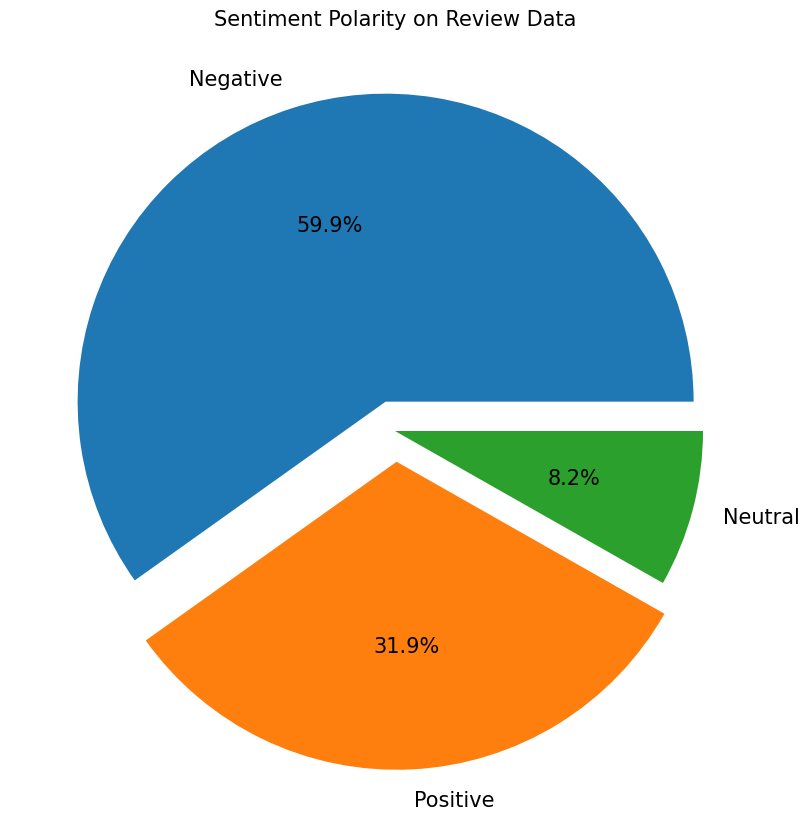

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (10, 10) inci.
fig, ax = plt.subplots(figsize=(10, 10))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'reviews_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in reviews_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'reviews_df' dan menyimpannya dalam list 'labels'.
labels = list(reviews_df['polarity'].value_counts().index)
labels = [label.capitalize() for label in labels]

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 15})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=15, pad=15)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = reviews_df[reviews_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['content_final', 'polarity_score', 'polarity','content_stop']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1
positive_tweets.head()

,content_final,polarity_score,polarity,content_stop
1,telkomsel cepat jaringan dibandingkan xlxl cepat akses jaringan gharga paket mahal kecepatan maksimal mb xl nyaman duluuntuk harga paket harga paket murah indosat murah kecepatan lumayan bandingkan telkomsel harga paket mahal kecepatan lambat tolong perbaiki harga paket kecepatan provider dllbiar konsumen nyaman,64,positive,"[telkomsel, cepat, jaringan, dibandingkan, xlxl, cepat, akses, jaringan, gharga, paket, mahal, kecepatan, maksimal, mb, xl, nyaman, duluuntuk, harga, paket, harga, paket, murah, indosat, murah, kecepatan, lumayan, bandingkan, telkomsel, harga, paket, mahal, kecepatan, lambat, tolong, perbaiki, harga, paket, kecepatan, provider, dllbiar, konsumen, nyaman]"
2,mari edit ulasan tsel ok pelayanan ok harga ok mahal provider terburuk dunia aplikasi ok fitur ok lock pulsa terpakai paket data habis via aplikasi kesehatan ok emosi ok bikin hati senang ok stabilitas sinyal ok stabilitas speed net ok harga wifi ok kasih bintang tsel,56,positive,"[mari, edit, ulasan, tsel, ok, pelayanan, ok, harga, ok, mahal, provider, terburuk, dunia, aplikasi, ok, fitur, ok, lock, pulsa, terpakai, paket, data, habis, via, aplikasi, kesehatan, ok, emosi, ok, bikin, hati, senang, ok, stabilitas, sinyal, ok, stabilitas, speed, net, ok, harga, wifi, ok, kasih, bintang, tsel]"
3,tolong direktur telkomsel berkaitan mengatur paket internet flash promo paket tolong paket internet flash promo gb harga rb jngan hilangkan ubah harga nyaitu promo minati masyarakat tolong penawaran promo paket internet upgred harga terjangkau maaf cuman kasih bintang penawaran paket internetnya memuaskan harga,53,positive,"[tolong, direktur, telkomsel, berkaitan, mengatur, paket, internet, flash, promo, paket, tolong, paket, internet, flash, promo, gb, harga, rb, jngan, hilangkan, ubah, harga, nyaitu, promo, minati, masyarakat, tolong, penawaran, promo, paket, internet, upgred, harga, terjangkau, maaf, cuman, kasih, bintang, penawaran, paket, internetnya, memuaskan, harga]"
4,hancuw paket game khusus game lancar lag pas paket lokalpaket utama habis login lambaaaaatngelagngefram paket game paket lokal spaya gk lagngefram ooohh gitu namanya paket game paket game husus game lancar login kagk w coba x beli paket game gitu ajatrmksh semoga perubahan kedepannya,53,positive,"[hancuw, paket, game, khusus, game, lancar, lag, pas, paket, lokalpaket, utama, habis, login, lambaaaaatngelagngefram, paket, game, paket, lokal, spaya, gk, lagngefram, ooohh, gitu, namanya, paket, game, paket, game, husus, game, lancar, login, kagk, w, coba, x, beli, paket, game, gitu, ajatrmksh, semoga, perubahan, kedepannya]"
5,make telkomsel nyaman tenang paket internet malam tersedia pilihan gb min tolonglah serakah banget sya paket malam sediain beragam pilihan sya tenang bersyukur suka paket malam harganya mantap nunggu malam tolong min munculkan paket malamnya,50,positive,"[make, telkomsel, nyaman, tenang, paket, internet, malam, tersedia, pilihan, gb, min, tolonglah, serakah, banget, sya, paket, malam, sediain, beragam, pilihan, sya, tenang, bersyukur, suka, paket, malam, harganya, mantap, nunggu, malam, tolong, min, munculkan, paket, malamnya]"


In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = reviews_df[reviews_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['content_final', 'polarity_score', 'polarity','content_stop']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1
negative_tweets.head()

,content_final,polarity_score,polarity,content_stop
1,sumpah sinyal telkomsel parah banget main game ane pakai siang malam pagi main game aplikasi matiin biar sinyal fokus game tetep parah parah parah parah parah parah parah parah parah parah parah parah rank turun tel gara elo,-74,negative,"[sumpah, sinyal, telkomsel, parah, banget, main, game, ane, pakai, siang, malam, pagi, main, game, aplikasi, matiin, biar, sinyal, fokus, game, tetep, parah, parah, parah, parah, parah, parah, parah, parah, parah, parah, parah, parah, rank, turun, tel, gara, elo]"
2,ispterngentotsaatini eh isp ngentot aplikasi buka nihtolol eg bangsat spam sms gateway mlulu aplikasi luh tot eh ngentod aplikasi memek nyedot pulsa kayak lobang memek aplikasi paket omg knapa pulsa sedotmemek tayeee ledig ngentod beli paket nihanjeeng aplikasi anjeeng aplikasi bangsat seringan eror bagus anjing stabil jaringan nyatot koneksi babi anjeeng aplikasi eror mlulu,-71,negative,"[ispterngentotsaatini, eh, isp, ngentot, aplikasi, buka, nihtolol, eg, bangsat, spam, sms, gateway, mlulu, aplikasi, luh, tot, eh, ngentod, aplikasi, memek, nyedot, pulsa, kayak, lobang, memek, aplikasi, paket, omg, knapa, pulsa, sedotmemek, tayeee, ledig, ngentod, beli, paket, nihanjeeng, aplikasi, anjeeng, aplikasi, bangsat, seringan, eror, bagus, anjing, stabil, jaringan, nyatot, koneksi, babi, anjeeng, aplikasi, eror, mlulu]"
3,berfungsi cek kuota manual dial aplikasi disaat kuota menipis membuka aplikasi wifi aplikasi membeli paket kuota aplikasi error kali informasi sisa kuota dicantumkan aplikasi salah salah alasan cek sisa kuota manual kecewa berpikir uninstal aplikasi buruk,-69,negative,"[berfungsi, cek, kuota, manual, dial, aplikasi, disaat, kuota, menipis, membuka, aplikasi, wifi, aplikasi, membeli, paket, kuota, aplikasi, error, kali, informasi, sisa, kuota, dicantumkan, aplikasi, salah, salah, alasan, cek, sisa, kuota, manual, kecewa, berpikir, uninstal, aplikasi, buruk]"
4,update trus suruh login stak verifikasi masak suruh verifikasi cuman detik sms verifikasinya menit dikirim tolol aplikasi mikir sinyalnya bagus indonesia tolol banget programernya males maketin aplikasi pecat programernya tolol banget aplikasi ribet eror melulu servernya bagus eh diudate eror tolol tolol,-66,negative,"[update, trus, suruh, login, stak, verifikasi, masak, suruh, verifikasi, cuman, detik, sms, verifikasinya, menit, dikirim, tolol, aplikasi, mikir, sinyalnya, bagus, indonesia, tolol, banget, programernya, males, maketin, aplikasi, pecat, programernya, tolol, banget, aplikasi, ribet, eror, melulu, servernya, bagus, eh, diudate, eror, tolol, tolol]"
5,aplikasi update berat cek sisa kuota persulit loadingnya ampun tata letak sisa kota aktif langsung klik kota aktif muncul itupun loading parah aplikasi cek sisa kota aktif sisa pulsa mah aplikasinya kebnyakan fitur transaksi orang suka aplikasi aplikasi shoping parah cek kuota persulit parah anjy,-66,negative,"[aplikasi, update, berat, cek, sisa, kuota, persulit, loadingnya, ampun, tata, letak, sisa, kota, aktif, langsung, klik, kota, aktif, muncul, itupun, loading, parah, aplikasi, cek, sisa, kota, aktif, sisa, pulsa, mah, aplikasinya, kebnyakan, fitur, transaksi, orang, suka, aplikasi, aplikasi, shoping, parah, cek, kuota, persulit, parah, anjy]"


In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = reviews_df[reviews_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
neutral_tweets = neutral_tweets[['content_final', 'polarity_score', 'polarity','content_stop']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1
neutral_tweets.head()

,content_final,polarity_score,polarity,content_stop
1,memuaskan aplikasi bug kebuka buffering tolong diperbaiki ditingkatkan kedepannya sinyal data hilang stabil dibilang telkomsel jaringan skala nasional pilihan mayoritas,0,neutral,"[memuaskan, aplikasi, bug, kebuka, buffering, tolong, diperbaiki, ditingkatkan, kedepannya, sinyal, data, hilang, stabil, dibilang, telkomsel, jaringan, skala, nasional, pilihan, mayoritas]"
2,kesini muter²,0,neutral,"[kesini, muter²]"
3,dibukaaaaa,0,neutral,[dibukaaaaa]
4,knapa buka,0,neutral,"[knapa, buka]"
5,buka apk,0,neutral,"[buka, apk]"


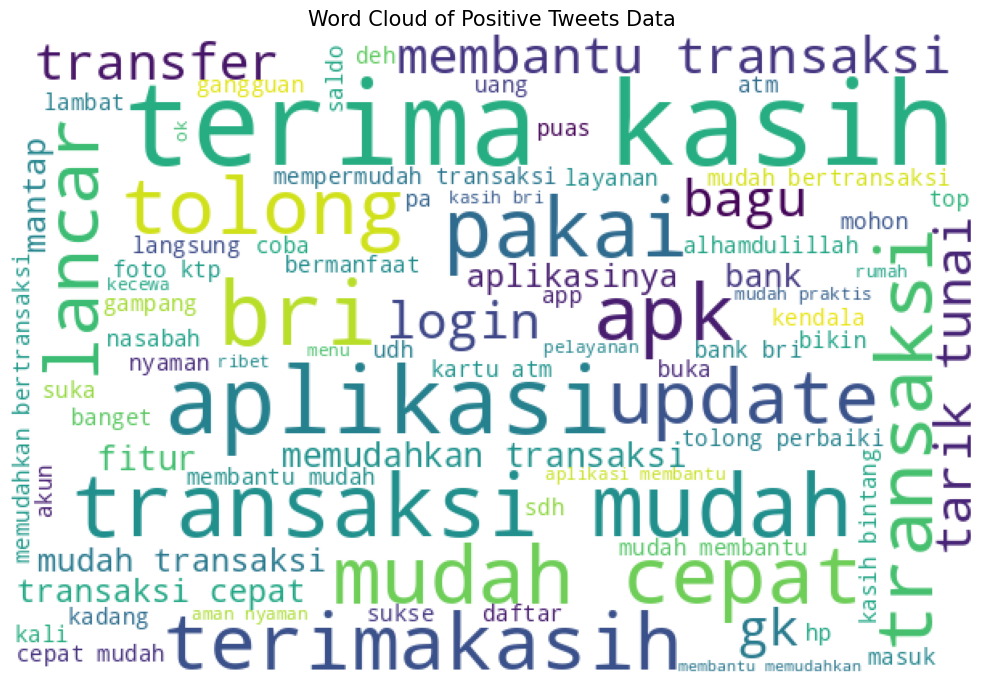

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'content_stop' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['content_stop']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(10, 10))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=15)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

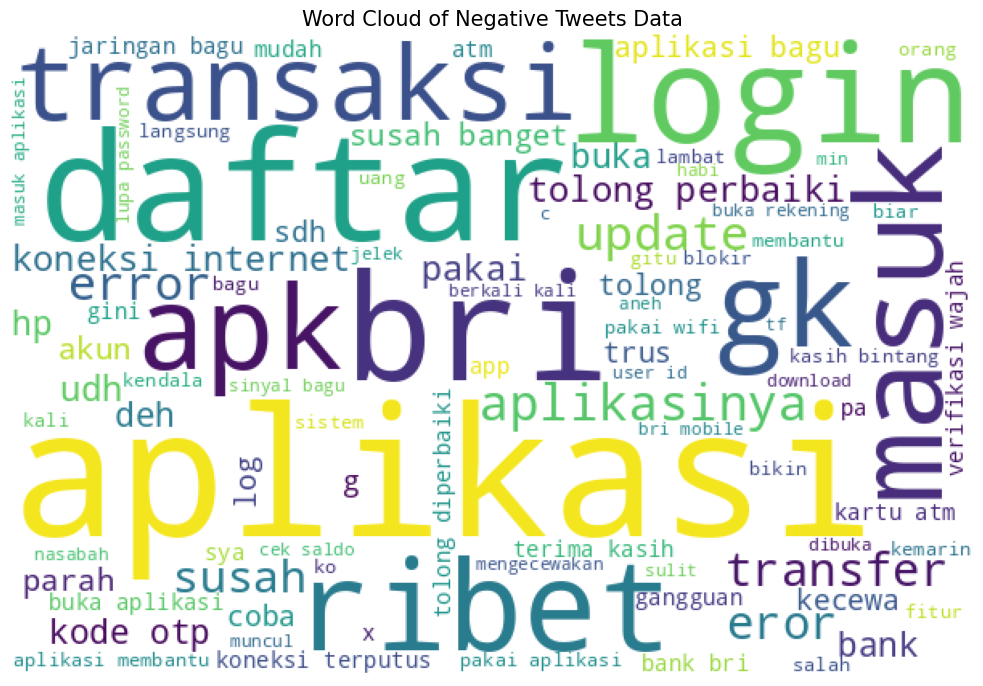

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'content_stop' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['content_stop']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(10, 10))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=15)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

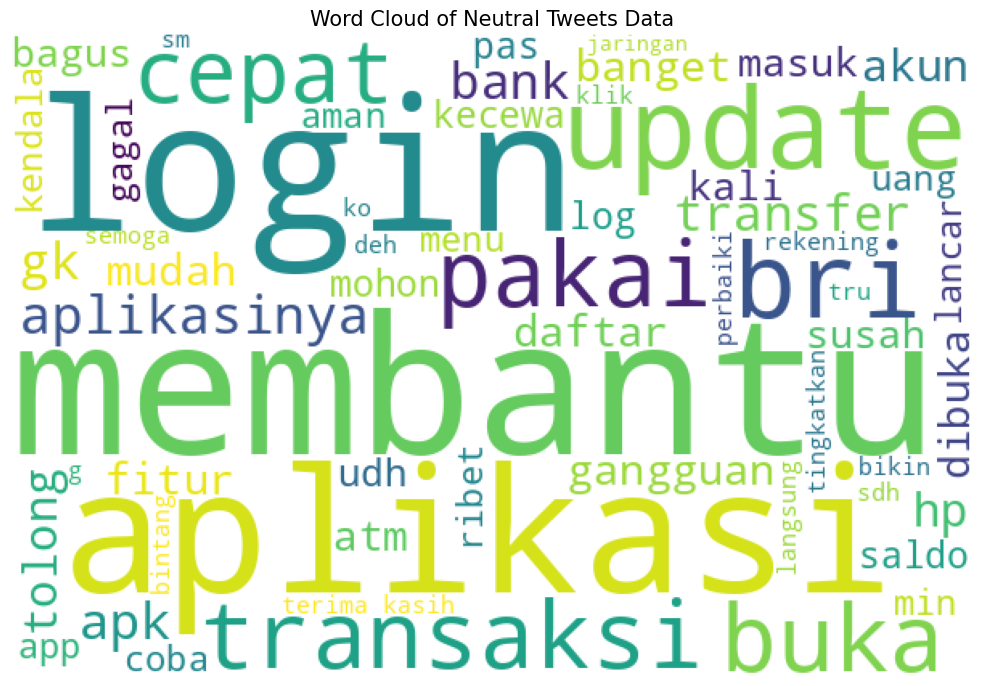

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'content_stop' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['content_stop']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(10, 10))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=15)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

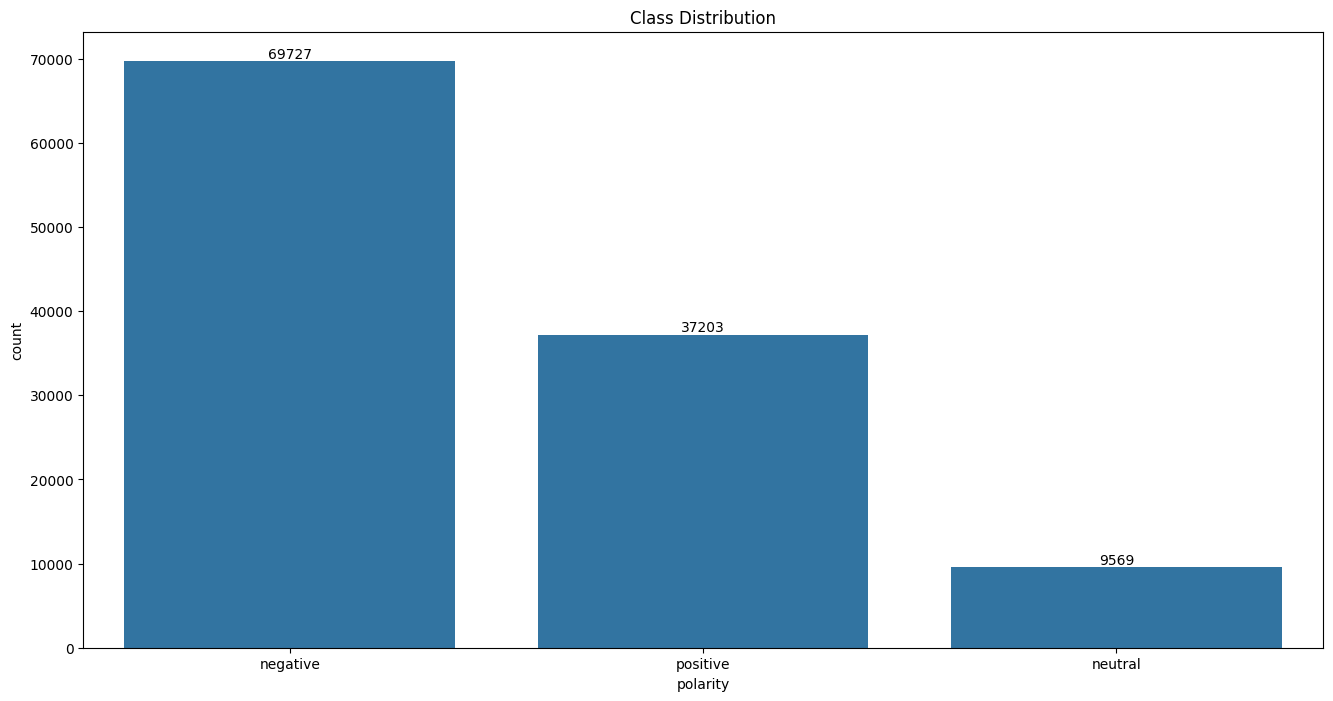

In [ ]:
plt.figure(figsize=(16, 8))

# Visualize class distribution
class_dist_plot = sns.countplot(x='polarity', data=reviews_df)
class_dist_plot.bar_label(class_dist_plot.containers[0])
plt.title('Class Distribution')
plt.show()

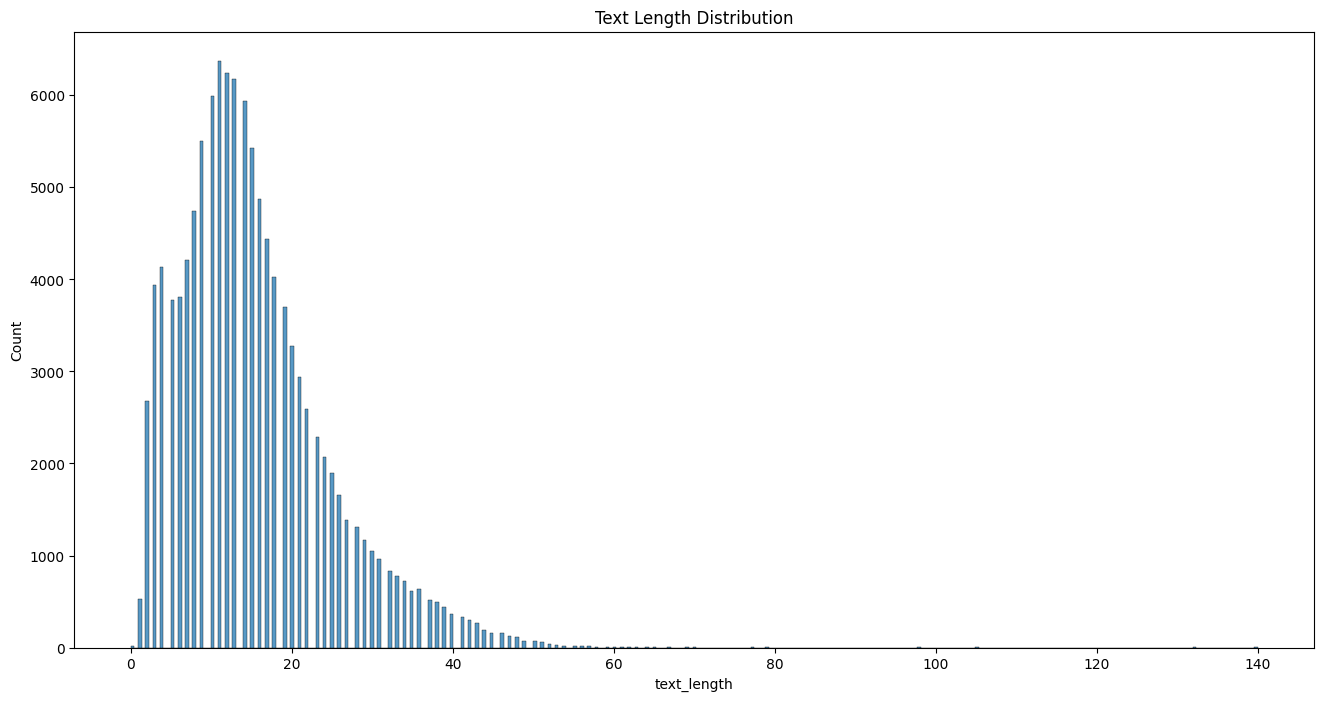

In [ ]:
plt.figure(figsize=(16, 8))

# Visualize text length distribution
reviews_df['text_length'] = reviews_df['content_final'].apply(lambda x: len(x.split()))
text_length_dist_plot = sns.histplot(x='text_length', data=reviews_df)
plt.title('Text Length Distribution')
plt.show()

## **Modeling**

In [ ]:
reviews_df.head()

,content,content_clean,content_casefold,content_slang,content_token,content_stop,content_final,polarity_score,polarity
0,"Makin hari makin BURUK! segala upaya biar lancar masuk aplikasi tetap ga berubah! clear cache/install ulang aplikasi tetap BERAT! kebanyakan ""fitur"" ga penting! Menu Homepage aja buat liat kuota/pulsa loadingnya parah,LAMA.. Aplikasi cuma buat liat kuota/pulsa/beli paket data lemotnya ngelebihin aplikasi Online Shop! sering crash,kadang force close.Ada stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu.",Makin hari makin BURUK segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap BERAT kebanyakan fitur ga penting Menu Homepage aja buat liat kuotapulsa loadingnya parahLAMA Aplikasi cuma buat liat kuotapulsabeli paket data lemotnya ngelebihin aplikasi Online Shop sering crashkadang force closeAda stamp harian berhadiah pun percuma kalo buka Aplikasi lemot kaya begitu,makin hari makin buruk segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap berat kebanyakan fitur ga penting menu homepage aja buat liat kuotapulsa loadingnya parahlama aplikasi cuma buat liat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop sering crashkadang force closeada stamp harian berhadiah pun percuma kalo buka aplikasi lemot kaya begitu,makin hari makin buruk segala upaya biar lancar masuk aplikasi tetap ga berubah clear cacheinstall ulang aplikasi tetap berat kebanyakan fitur ga penting menu homepage saja buat lihat kuotapulsa loadingnya parahlama aplikasi cuma buat lihat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop sering crashkadang force closeada stamp harian berhadiah pun percuma kalau buka aplikasi lambat kaya begitu,"[makin, hari, makin, buruk, segala, upaya, biar, lancar, masuk, aplikasi, tetap, ga, berubah, clear, cacheinstall, ulang, aplikasi, tetap, berat, kebanyakan, fitur, ga, penting, menu, homepage, saja, buat, lihat, kuotapulsa, loadingnya, parahlama, aplikasi, cuma, buat, lihat, kuotapulsabeli, paket, data, lemotnya, ngelebihin, aplikasi, online, shop, sering, crashkadang, force, closeada, stamp, harian, berhadiah, pun, percuma, kalau, buka, aplikasi, lambat, kaya, begitu]","[buruk, upaya, biar, lancar, masuk, aplikasi, berubah, clear, cacheinstall, ulang, aplikasi, berat, kebanyakan, fitur, menu, homepage, lihat, kuotapulsa, loadingnya, parahlama, aplikasi, lihat, kuotapulsabeli, paket, data, lemotnya, ngelebihin, aplikasi, online, shop, crashkadang, force, closeada, stamp, harian, berhadiah, buka, aplikasi, lambat, kaya]",buruk upaya biar lancar masuk aplikasi berubah clear cacheinstall ulang aplikasi berat kebanyakan fitur menu homepage lihat kuotapulsa loadingnya parahlama aplikasi lihat kuotapulsabeli paket data lemotnya ngelebihin aplikasi online shop crashkadang force closeada stamp harian berhadiah buka aplikasi lambat kaya,-21,negative
1,"Perbaiki dulu jaringannya paketnya sudah mahal knapa daerah Kaltim masih saja kesusahan untuk merasakan jaringan. Kami juga warga negara Indonesia tolong lah kerjasamanya jaringan di tempat kami masih sangat buruk mohon untuk di perbaiki dan di tingkat kan untuk sarana, fasilitas dan kecepatan internet nya. Bukan hilang muncul hilang muncul",Perbaiki dulu jaringannya paketnya sudah mahal knapa daerah Kaltim masih saja kesusahan untuk merasakan jaringan Kami juga warga negara Indonesia tolong lah kerjasamanya jaringan di tempat kami masih sangat buruk mohon untuk di perbaiki dan di tingkat kan untuk sarana fasilitas dan kecepatan internet nya Bukan hilang muncul hilang muncul,perbaiki dulu jaringannya paketnya sudah mahal knapa daerah kaltim masih saja kesusahan untuk merasakan jaringan kami juga warga negara indonesia tolong lah kerjasamanya jaringan di tempat kami masih sangat buruk mohon untuk di perbaiki dan di tingkat kan untuk sarana fasilitas dan kecepatan internet nya bukan hilang muncul hilang muncul,perbaiki dulu jaringa

### **Recurrent Neural Network (RNN) + Embedding + 70:30**

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = reviews_df['content_final']
y = reviews_df['polarity']

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(rnn_X_train)

# Konversi teks ke token angka
rnn_X_train_token_seq = tokenizer.texts_to_sequences(rnn_X_train)
print("Train Sequences:", rnn_X_train_token_seq)

rnn_X_test_token_seq = tokenizer.texts_to_sequences(rnn_X_test)
print("Test Sequences:", rnn_X_test_token_seq)

word_index = tokenizer.word_index
print("Word Index:", word_index)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
rnn_train_longest_sentence = max(rnn_X_train_token_seq, key=len)
print("Length of longest Train Sentence:", len(rnn_train_longest_sentence))

rnn_test_longest_sentence = max(rnn_X_test_token_seq, key=len)
print("Length of longest Test sentence:", len(rnn_test_longest_sentence))

Length of longest Train Sentence: 140
Length of longest Test sentence: 66


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding sequences agar panjangnya sama
rnn_X_train_token_pad_seq = pad_sequences(
    rnn_X_train_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Train Padded Sequences:\n", rnn_X_train_token_pad_seq)

rnn_X_test_token_pad_seq = pad_sequences(
    rnn_X_test_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Test Padded Sequences:\n", rnn_X_test_token_pad_seq)

Train Padded Sequences:
 [[  29   54    4 ...    0    0    0]
 [  25   18  716 ...    0    0    0]
 [3240  240    2 ...    0    0    0]
 ...
 [   1   66   50 ...    0    0    0]
 [   4   37 1912 ...    0    0    0]
 [  15    9   32 ...    0    0    0]]
Test Padded Sequences:
 [[  27   37    0 ...    0    0    0]
 [ 268  159  246 ...    0    0    0]
 [   3   10    0 ...    0    0    0]
 ...
 [ 131  281 3337 ...    0    0    0]
 [   5  146 1404 ...    0    0    0]
 [ 224   20    4 ...    0    0    0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

rnn_y_train_encoded = encoder.fit_transform(rnn_y_train)
rnn_y_test_encoded = encoder.transform(rnn_y_test)

print("Train Label", rnn_y_train_encoded)
print("Test Label", rnn_y_test_encoded)

Train Label [0 0 2 ... 0 0 2]
Test Label [1 2 2 ... 2 0 0]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    Bidirectional(SimpleRNN(32, activation='tanh', return_sequences=True)),
    Bidirectional(SimpleRNN(16, activation='tanh', return_sequences=False)),
    Dense(3, activation='softmax'),
])

rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

rnn_history = rnn_model.fit(
    rnn_X_train_token_pad_seq,
    rnn_y_train_encoded,
    validation_data=(rnn_X_test_token_pad_seq, rnn_y_test_encoded),
    epochs=3, batch_size=32, verbose=1,
)

Epoch 1/3
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 357s 136ms/step - accuracy: 0.7916 - loss: 0.5196 - val_accuracy: 0.9100 - val_loss: 0.2527
Epoch 2/3
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 335s 132ms/step - accuracy: 0.9232 - loss: 0.2144 - val_accuracy: 0.9144 - val_loss: 0.2309
Epoch 3/3
2549/2549 ━━━━━━━━━━━━━━━━━━━━ 381s 131ms/step - accuracy: 0.9323 - loss: 0.1807 - val_accuracy: 0.9233 - val_loss: 0.2059


In [ ]:
rnn_loss, rnn_accuracy = rnn_model.evaluate(
    rnn_X_test_token_pad_seq, rnn_y_test_encoded, verbose=1,
)

print(f"Test Loss: {rnn_loss}")
print(f"Test Accuracy: {rnn_accuracy}")

1093/1093 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.9243 - loss: 0.2013
Test Loss: 0.2058829367160797
Test Accuracy: 0.9233190417289734


### **Long Short Term Memory (LSTM) + Embedding + 80:20**

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = reviews_df['content_final']
y = reviews_df['polarity']

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

lstm_X_train, lstm_X_test, lstm_y_train, lstm_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(lstm_X_train)

# Konversi teks ke token angka
lstm_X_train_token_seq = tokenizer.texts_to_sequences(lstm_X_train)
print("Train Sequences:", lstm_X_train_token_seq)

lstm_X_test_token_seq = tokenizer.texts_to_sequences(lstm_X_test)
print("Test Sequences:", lstm_X_test_token_seq)

word_index = tokenizer.word_index
print("Word Index:", word_index)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
lstm_train_longest_sentence = max(lstm_X_train_token_seq, key=len)
print("Length of longest Train Sentence:", len(lstm_train_longest_sentence))

lstm_test_longest_sentence = max(lstm_X_test_token_seq, key=len)
print("Length of longest Test sentence:", len(lstm_test_longest_sentence))

Length of longest Train Sentence: 140
Length of longest Test sentence: 62


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding sequences agar panjangnya sama
lstm_X_train_token_pad_seq = pad_sequences(
    lstm_X_train_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Train Padded Sequences:\n", lstm_X_train_token_pad_seq)

lstm_X_test_token_pad_seq = pad_sequences(
    lstm_X_test_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Test Padded Sequences:\n", lstm_X_test_token_pad_seq)

Train Padded Sequences:
 [[   2   12    1 ...    0    0    0]
 [ 393  238    4 ...    0    0    0]
 [   5    2    1 ...    0    0    0]
 ...
 [   1   66   50 ...    0    0    0]
 [   4   37 1908 ...    0    0    0]
 [  15    9   32 ...    0    0    0]]
Test Padded Sequences:
 [[ 27  37   0 ...   0   0   0]
 [275 159 242 ...   0   0   0]
 [  3  11   0 ...   0   0   0]
 ...
 [ 54   2 381 ...   0   0   0]
 [ 10  22 123 ...   0   0   0]
 [118  77  77 ...   0   0   0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

lstm_y_train_encoded = encoder.fit_transform(lstm_y_train)
lstm_y_test_encoded = encoder.transform(lstm_y_test)

print("Train Label", lstm_y_train_encoded)
print("Test Label", lstm_y_test_encoded)

Train Label [0 0 0 ... 0 0 2]
Test Label [1 2 2 ... 2 2 2]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    Bidirectional(LSTM(32, activation='tanh', return_sequences=True)),
    Bidirectional(LSTM(16, activation='tanh', return_sequences=False)),
    Dense(3, activation='softmax'),
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

lstm_history = lstm_model.fit(
    lstm_X_train_token_pad_seq,
    lstm_y_train_encoded,
    validation_data=(lstm_X_test_token_pad_seq, lstm_y_test_encoded),
    epochs=3, batch_size=32, verbose=1,
)

Epoch 1/3
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 626s 212ms/step - accuracy: 0.8268 - loss: 0.4354 - val_accuracy: 0.9252 - val_loss: 0.2004
Epoch 2/3
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 638s 217ms/step - accuracy: 0.9326 - loss: 0.1808 - val_accuracy: 0.9164 - val_loss: 0.2280
Epoch 3/3
2913/2913 ━━━━━━━━━━━━━━━━━━━━ 618s 212ms/step - accuracy: 0.9450 - loss: 0.1458 - val_accuracy: 0.9275 - val_loss: 0.1996


In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    lstm_X_test_token_pad_seq,
    lstm_y_test_encoded,
    verbose=1,
)

print(f"Test Loss: {lstm_loss}")
print(f"Test Accuracy: {lstm_accuracy}")

729/729 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.9268 - loss: 0.2008
Test Loss: 0.19957731664180756
Test Accuracy: 0.9274678230285645


### **Gated Reccurent Unit (GRU) + Embedding + 90:10**

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = reviews_df['content_final']
y = reviews_df['polarity']

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

gru_X_train, gru_X_test, gru_y_train, gru_y_test = train_test_split(
    X, y, test_size=0.1, random_state=42,
)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(gru_X_train)

# Konversi teks ke token angka
gru_X_train_token_seq = tokenizer.texts_to_sequences(gru_X_train)
print("Train Sequences:", gru_X_train_token_seq)

gru_X_test_token_seq = tokenizer.texts_to_sequences(gru_X_test)
print("Test Sequences:", gru_X_test_token_seq)

word_index = tokenizer.word_index
print("Word Index:", word_index)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gru_train_longest_sentence = max(gru_X_train_token_seq, key=len)
print("Length of longest Train Sentence:", len(gru_train_longest_sentence))

gru_test_longest_sentence = max(gru_X_test_token_seq, key=len)
print("Length of longest Test sentence:", len(gru_test_longest_sentence))

Length of longest Train Sentence: 140
Length of longest Test sentence: 57


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding sequences agar panjangnya sama
gru_X_train_token_pad_seq = pad_sequences(
    gru_X_train_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Train Padded Sequences:\n", gru_X_train_token_pad_seq)

gru_X_test_token_pad_seq = pad_sequences(
    gru_X_test_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)
print("Test Padded Sequences:\n", gru_X_test_token_pad_seq)

Train Padded Sequences:
 [[1550    2    1 ...    0    0    0]
 [   4   12   35 ...    0    0    0]
 [  18   27    8 ...    0    0    0]
 ...
 [   1   65   50 ...    0    0    0]
 [   4   37 1950 ...    0    0    0]
 [  15    9   33 ...    0    0    0]]
Test Padded Sequences:
 [[ 27  37   0 ...   0   0   0]
 [266 159 244 ...   0   0   0]
 [  3  11   0 ...   0   0   0]
 ...
 [354  15   2 ...   0   0   0]
 [ 34   0   0 ...   0   0   0]
 [ 27   1   1 ...   0   0   0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

gru_y_train_encoded = encoder.fit_transform(gru_y_train)
gru_y_test_encoded = encoder.transform(gru_y_test)

print("Train Label", gru_y_train_encoded)
print("Test Label", gru_y_test_encoded)

Train Label [2 0 1 ... 0 0 2]
Test Label [1 2 2 ... 0 1 0]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
from tensorflow.keras.optimizers import Adam

gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    Bidirectional(GRU(32, activation='tanh', return_sequences=True)),
    Bidirectional(GRU(16, activation='tanh', return_sequences=False)),
    Dense(3, activation='softmax'),
])

gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

gru_history = gru_model.fit(
    gru_X_train_token_pad_seq,
    gru_y_train_encoded,
    validation_data=(gru_X_test_token_pad_seq, gru_y_test_encoded),
    epochs=3, batch_size=32, verbose=1,
)

Epoch 1/3
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 866s 261ms/step - accuracy: 0.8347 - loss: 0.4208 - val_accuracy: 0.9289 - val_loss: 0.1971
Epoch 2/3
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 854s 261ms/step - accuracy: 0.9378 - loss: 0.1695 - val_accuracy: 0.9398 - val_loss: 0.1655
Epoch 3/3
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 871s 263ms/step - accuracy: 0.9490 - loss: 0.1395 - val_accuracy: 0.9363 - val_loss: 0.1789


In [ ]:
gru_loss, gru_accuracy = gru_model.evaluate(
    gru_X_test_token_pad_seq, gru_y_test_encoded, verbose=1,
)

print(f"Test Loss: {gru_loss}")
print(f"Test Accuracy: {gru_accuracy}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9351 - loss: 0.1781
Test Loss: 0.1788565218448639
Test Accuracy: 0.9363090395927429


### **All Model Loss & Accuracy Results**

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['RNN (Recurrent Neural Network) + Embedding + 70:30', 'LSTM (Long Short Term Memory) + Embedding + 80:20', 'GRU (Gated Recurrent Unit) + Embedding + 90:10'],
    'Test Loss': [rnn_loss, lstm_loss, gru_loss],
    'Test Accuracy': [rnn_accuracy, lstm_accuracy, gru_accuracy],
})

results_df.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Loss,Test Accuracy
2,GRU (Gated Recurrent Unit) + Embedding + 90:10,0.178857,0.936309
1,LSTM (Long Short Term Memory) + Embedding + 80:20,0.199577,0.927468
0,RNN (Recurrent Neural Network) + Embedding + 70:30,0.205883,0.923319


Dalam kasus Sentiment Analysis ini, algoritma GRU (Gated Recurrent Unit) mencapai akurasi tertinggi sebesar 93,63%. Oleh karena itu, algoritma GRU (Gated Recurrent Unit) dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [ ]:
# Input kalimat baru dari pengguna
sentence = input("Insert Sentence: ")

# Melakukan preprocessing pada kalimat baru
sentence_clean = add_cleaning(sentence)
sentence_casefold = add_casefolding(sentence_clean)
sentence_slang = add_slangwords(sentence_casefold)
sentence_token = add_tokenizing(sentence_slang)
sentence_stop = add_stopwords(sentence_token)
sentence_final = to_sentence(sentence_stop)

sentence_final = [sentence_final]
print("Sentences After Preprocessing: ", sentence_final)

sentence_token_seq = tokenizer.texts_to_sequences(sentence_final)
print("Sequences:", sentence_token_seq)

sentence_token_pad_seq = pad_sequences(
    sentence_token_seq,
    maxlen=140, padding="post",
    truncating="post",
)

# Memperoleh prediksi sentimen kalimat baru
prediction = gru_model.predict(sentence_token_pad_seq)

print(prediction)

# Ambil kelas dengan probabilitas tertinggi
predicted_class = np.argmax(prediction, axis=-1)[0]

# Mapping kelas
class_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
predicted_label = class_labels[predicted_class]
print("Predicted Label:", predicted_label)

Insert Sentence: Pemakaian selama sebulan aman, dipakai buat internetan kenceng banget. happy banget deh
Sentences After Preprocessing:  ['pemakaian sebulan aman dipakai internetan kenceng banget bahagia banget deh']
Sequences: [[252, 351, 310, 197, 383, 529, 15, 2399, 15, 58]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[0.01857593 0.11298117 0.8684429 ]]
Predicted Label: Positive


In [ ]:
!pip freeze > requirements.txt